# GDP and population

Imports and set magics:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## GDP data

**Read the GDP data** in ``GDP per cap.xlsx`` and clean it:

In [31]:
# a. load
GDP_per_capita = pd.read_excel('GDP per cap.xlsx', skiprows=1)

# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code',
]
GDP_per_capita.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict[str(i)] = f'GDP{i}' 
GDP_per_capita.rename(columns = myDict, inplace=True)

# d. drop na: Remove all rows which do not have GDP data in all periods.
GDP_per_capita = GDP_per_capita.dropna()

# a. convert dataset to long
GDP_per_capita_long = pd.wide_to_long(GDP_per_capita, stubnames='GDP', i='Location', j='Year').reset_index()

# b. show
GDP_per_capita_long.head(5)


,Location,Year,Location code,GDP
0,Algeria,1990,DZA,3124.000
1,Angola,1990,AGO,2985.760
2,Bahrain,1990,BHR,19243.900
3,Benin,1990,BEN,577.263
4,Botswana,1990,BWA,3681.990


## Population data

**Read the income data** in ``POP.xlsx`` and **clean it**:

In [30]:
# a. load
pop = pd.read_excel('POP.xlsx', skiprows=1)


# b. drop columns
drop_these = ['Indicator', 'Units', 'Scale', 'Measurement', 'Source',	'Seasonally adjusted',	'Base year price',	'Base year index',	'Historical end year',	'Historical end quarter',	'Date of last update',	'Source details',	'Additional source details',	'Indicator code']
pop.drop(drop_these, axis=1, inplace=True)

# c. rename columns
myDict_pop = {}
for i in range(1990, 2020+1): # range goes from 1990 to 2020
    myDict_pop[str(i)] = f'pop{i}' 
pop.rename(columns = myDict_pop, inplace=True)
pop.head(10)

# d. drop na
pop = pop.dropna()


# e. convert to long
pop_long = pd.wide_to_long(pop, stubnames='pop', i='Location', j='Year').reset_index()

# f. show
pop_long.head(5)

,Location,Year,Location code,pop
0,Algeria,1990,DZA,25758.900
1,Angola,1990,AGO,11848.400
2,Bahrain,1990,BHR,468.165
3,Benin,1990,BEN,4978.490
4,Botswana,1990,BWA,1286.760


# Explore data set

In order to be able to explore the data, we here provide two **interactive plots** to show the GDP per capita and the population in each country, respectively.

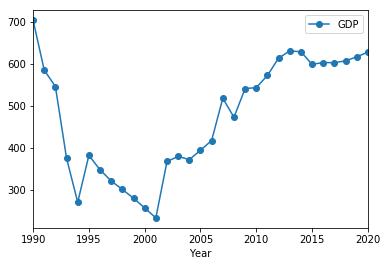

In [27]:
def plot_GDP(df, Location): 
    I = df['Location'] == Location
    ax=df.loc[I,:].plot(x='Year', y='GDP', style='-o', legend=True)
[46]
widgets.interact(plot_GDP, 
    df = widgets.fixed(GDP_per_capita_long),
    Location = widgets.Dropdown(description='Location', 
                                    options=GDP_per_capita_long.Location.unique(), 
                                    value='Afghanistan')
); 

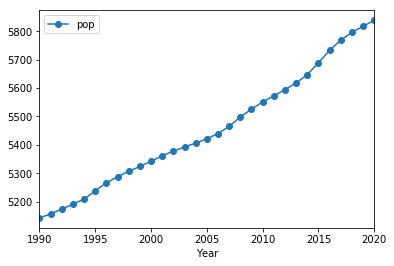

In [21]:
def plot_pop(df, Location): 
    I = df['Location'] == Location
    ax=df.loc[I,:].plot(x='Year', y='pop', style='-o', legend=True)
[46]
widgets.interact(plot_pop, 
    df = widgets.fixed(pop_long),
    Location = widgets.Dropdown(description='Location', 
                                    options=pop_long.Location.unique(), 
                                    value='Denmark')
); 

# Merge data sets

In [ ]:
GDP_pop = pd.merge(GDP_per_capita_long, pop_long, how='inner',on=['Location code', 'Year'])
drop_duplicate_location = ['Location_y']
GDP_pop.drop(drop_duplicate_location, axis=1, inplace=True)
GDP_pop.rename(columns = {'Location_x':'Location'}, inplace=True)
GDP_pop.head(10)

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [34]:
GDP_pop.groupby('Year').agg(["mean", "max", "min"]).round(2)

#GDP_pop.describe()
GDP_pop_group4 = GDP_pop[(GDP_pop.GDP <= 1959.62) & (GDP_pop.Year == 2019)]
GDP_pop_group3 = GDP_pop[( GDP_pop.GDP >= 1959.62) & (GDP_pop.GDP <= 6404.62) & (GDP_pop.Year == 2019)]
GDP_pop_group2 = GDP_pop[( GDP_pop.GDP >= 6404.62) & (GDP_pop.GDP <= 21745.90) & (GDP_pop.Year == 2019)]
GDP_pop_group1 = GDP_pop[( GDP_pop.GDP >= 21745.90)  & (GDP_pop.Year == 2019)]
GDP_pop_group1.head(5)

,Location,Year,Location code,GDP,pop
5483,Bahrain,2019,BHR,24499.8,1414.050
5509,Israel,2019,ISR,40654.9,8518.310
5511,Kuwait,2019,KWT,27393.2,4199.080
5527,Qatar,2019,QAT,60187.4,2828.950
5528,Reunion,2019,REU,25167.4,888.916


Joiner tal fra resterende år på vores group 1-4 

In [35]:
# group 1
join_group1 = pd.merge(GDP_pop_group1, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group1.drop(drop_these, axis=1, inplace=True)
join_group1.rename(columns = rename_these, inplace=True)
# group 2
join_group2 = pd.merge(GDP_pop_group2, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group2.drop(drop_these, axis=1, inplace=True)
join_group2.rename(columns = rename_these, inplace=True)
# group 3
join_group3 = pd.merge(GDP_pop_group3, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group3.drop(drop_these, axis=1, inplace=True)
join_group3.rename(columns = rename_these, inplace=True)
# group 4
join_group4 = pd.merge(GDP_pop_group4, GDP_pop, how='left',on=['Location code'])
drop_these = ['Year_x', 'GDP_x', 'pop_x', 'Location_y']
rename_these = {'Year_y':'year', 'GDP_y':'GDP', 'pop_y':'pop'}
join_group4.drop(drop_these, axis=1, inplace=True)
join_group4.rename(columns = rename_these, inplace=True)

Here we take logs of GDP and population and calculate the growth rates for each variable by using first diff. 

In [44]:
# Take logs of GDP
join_group1['log_GDP'] =  np.log(join_group1['GDP'])
join_group2['log_GDP'] =  np.log(join_group2['GDP'])
join_group3['log_GDP'] =  np.log(join_group3['GDP'])
join_group4['log_GDP'] =  np.log(join_group4['GDP'])

# Take logs of population 
join_group1['log_pop'] =  np.log(join_group1['pop'])
join_group2['log_pop'] =  np.log(join_group2['pop'])
join_group3['log_pop'] =  np.log(join_group3['pop'])
join_group4['log_pop'] =  np.log(join_group4['pop'])

# GDP growth rates
join_group1['growth_GDP'] = join_group1['log_GDP'].diff(1)
join_group2['growth_GDP'] = join_group2['log_GDP'].diff(1)
join_group3['growth_GDP'] = join_group3['log_GDP'].diff(1)
join_group4['growth_GDP'] = join_group4['log_GDP'].diff(1)

# Population Growth rates
join_group1['growth_pop'] = join_group1['log_pop'].diff(1)
join_group2['growth_pop'] = join_group2['log_pop'].diff(1)
join_group3['growth_pop'] = join_group3['log_pop'].diff(1)
join_group4['growth_pop'] = join_group4['log_pop'].diff(1)

# Creating a new variable for income group
join_group1['income_group'] = str("group_1")
join_group2['income_group'] = str("group_2")
join_group3['income_group'] = str("group_3")
join_group4['income_group'] = str("group_4")

# Merge group tables
outcome = pd.concat([join_group1, join_group2, join_group3, join_group4])

outcome.groupby(['income_group', 'year']).agg(["mean"]).round(2)

#outcome.groupby(['income_group', 'year']).growth_GDP.mean()





GDP       pop log_GDP log_pop growth_GDP growth_pop
                       mean      mean    mean    mean       mean       mean
income_group year                                                          
group_1      1990  29860.36  24408.98   10.17    7.70      -0.46      -0.26
             1991  29716.46  24586.56   10.17    7.71      -0.00       0.01
             1992  30207.40  24765.18   10.20    7.72       0.03       0.01
             1993  30930.01  24939.52   10.24    7.73       0.04       0.01
             1994  31802.25  25096.88   10.27    7.75       0.03       0.01
...                     ...       ...     ...     ...        ...        ...
group_4      2016    941.56  26091.03    6.72    9.35       0.01       0.02
             2017    961.47  26670.47    6.74    9.37       0.02       0.02
             2018    980.59  27269.30    6.76    9.39       0.02       0.02
             2019    997.51  27873.89    6.77    9.41       0.02       0.02
             2020   1021.57  28484.83    6.80    9.44       0.02       0.02

[124 rows x 6 columns]

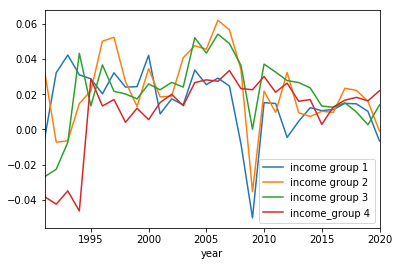

In [43]:
outcome1991 = outcome[(outcome.year > 1990) & (outcome.Location_x != "Eritrea")]
join_group11991= join_group1[join_group1.year > 1990]
join_group21991= join_group2[join_group2.year > 1990] 
join_group31991= join_group3[join_group3.year > 1990]
join_group41991= join_group4[(join_group4.year > 1990) & (join_group4.Location_x != "Eritrea")]

#outcome1991.groupby(['income_group', 'year']).growth_GDP.mean().plot()
join_group11991.groupby(["year"]).growth_GDP.mean().plot()
join_group21991.groupby(["year"]).growth_GDP.mean().plot()
join_group31991.groupby(["year"]).growth_GDP.mean().plot()
join_group41991.groupby(["year"]).growth_GDP.mean().plot().legend(["income group 1","income group 2","income group 3","income_group 4"])

 

Text(0,0.5,'Average growth in population')

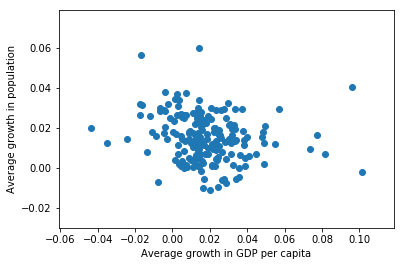

In [42]:
# Scatter plot
scatterx = outcome1991.groupby(["Location_x"]).growth_GDP.mean()
scattery = outcome1991.groupby(["Location_x"]).growth_pop.mean()


plt.scatter(scatterx, scattery)
plt.xlabel("Average growth in GDP per capita")
plt.ylabel("Average growth in population")


# Conclusion

 5 grupper defineret på forskellige GDP per capita niveau. Vækstrater, Korrelationskoefficienter